#### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [3]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [4]:
X_st = X.copy().astype(np.float64)

In [5]:
for i in range(1, X.shape[0]):
    X_st[i] = calc_std_feat(X[i])

In [6]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [7]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    return W

In [8]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [9]:
lambdas = [0.0001, 0.005, 0.001, 0.05, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

In [10]:
W = []
for lmbd in lambdas:
    W.append(eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lmbd))

<function matplotlib.pyplot.show(*args, **kw)>

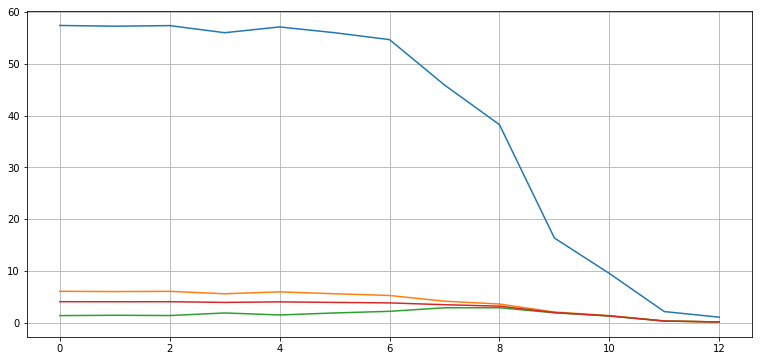

In [11]:
plt.figure(figsize=(13, 6))
plt.plot(W)
plt.grid() 
plt.show

#### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Нет<br>
Нормализация используется преимущественно для масштабирования признака  <br>
Стандартизация используется при масштабировании и смещении среднего <br>

нет смысла применять два действия к одному признаку